## Modeling the motion of a charge in a magnetic field

In this problem, you will develop the essential computational physics to model the motion of a charged particle in a magnetic field. The force acting on such a particle is,

$$\mathbf{F} = q \mathbf{v} \times \mathbf{B}$$

The code below sets up all the parameters and initial conditions that you need and provides the loop structure needed to model the motion. The essential physics that you need to provide will do the following:

1. Compute the magnetic force
2. Update the velocity by simple numerical integration (Euler step)
3. Update the position by simple numerical integration (Euler step)

After you complete the numerical integration, we ask you to plot the motion in 3 dimensions. You might have to look up how to do that online.

Once your code is working for the case of a positive charge with no initial velicty in the direction of the magnetic field, this problem asks you to:
1. use the code to model the motion of the positive charge with an initial velocity that includes a component in the direction of the magnetic field, and
2. use the code to model the motion of a negative charge also with an initial velocity that includes a component in the direction of the magnetic field.

### Import necessary libraries and setup plots

Below, we call the Python numerical library (```numpy```) and the 3D plotting module.  We also make sure plots occur inline and we set the size of the plots.

In [10]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc("figure", figsize=(8,8))

### Setup constants, parameters, and initialize vectors

Below, we define the mass and charge of the positive particle, which we define in SI units. We also give the initial speed of the particle and the strength of the magnetic field in SI units. We also set up the array that keeps track of the time, and initialize arrays that keep track of the position and velocity vectors (careful here! these arrays have 3 components per element).

In [2]:
mp = 1.67E-27        # mass of proton: kg
qe = 1.602E-19       # charge of proton: C

v0 = 1e3             # speed of the proton: m/s
B0 = 1.0E-4          # strength of the magnetic field: T

## Setup the timing
dt = 1.0E-8          # time step: s
t = np.arange(0.0, 0.005, dt) # array of time

## Initialize position and veloicty arrays to be zero
rp = np.zeros((len(t), 3))    ##position
vp = np.zeros((len(t), 3))    ##velocity

### Setup initial conditions
To expeirence a magnetic force, the charge needs to be moving. We initialize the position and velocity arrays below with an initial condition on the velocity that is non-zero only in the $x$-direction.

Notice also they way that an element in the array is referenced. For example, ```rp[0,:]``` references all 3 components of the first (zeroth) element in the array. This will be important for doing the numerical integration.

In [3]:
# initial condition
rp[0,:] = np.array([0.0, 0.0, 0.0])
vp[0,:] = np.array([v0, 0.0, 0.0])

### Integration loop
Below, we created a loop that runs until the final time. In this loop, you need to:

1. Compute the magnetic force (as a vector)
2. Update the velocity by simple numerical integration (Euler step)
3. Update the position by simple numerical integration (Euler step)

In [5]:
##Make the B field a vector so I can shortcut
B = np.array([0.0, B0, 0.0])

In [7]:
# Integration Loop
##I'm doing advanced Euler method stuff in my numerical analysis class
##I'm ashamed to say I still had to spend several minutes on the wiki page 

## y_i+1 = y_i + F_i*dt

def Euler_2step():
    for i in range(0, len(t)-1):
        ##Calculate the force with the cross product
        ##My dumbass wants to make this as computationally expensive as possible
        F = np.cross(qe*vp[i,:], B)
        
        ##Use Euler method on these good boys
        vp[i+1,:] = vp[i,:] + F*dt
        rp[i+1,:] = rp[i,:] + vp[i,:]*dt
    return vp, rp

### Plot the results

Plot your results in 3-dimensions using the 3D plotting toolkit.

In [8]:
##Stealing code from hw 7 
vp, rp = Euler_2step()

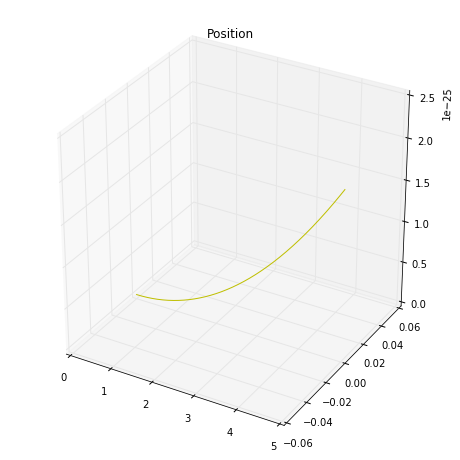

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(rp[:,0], rp[:,1], rp[:,2], color='y')
plt.title("Position")

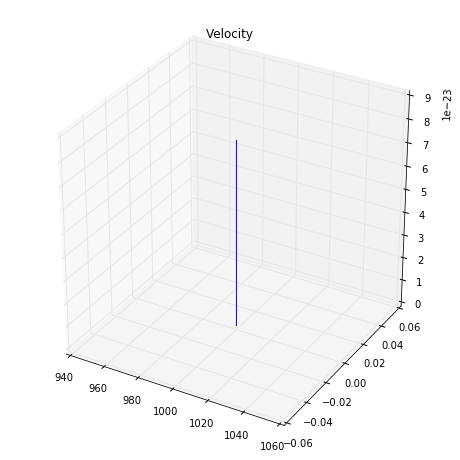

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vp[:,0], vp[:,1], vp[:,2], color='blue')
plt.title("Velocity")

In [31]:
##reset inital conditions, and then give intial velocity in y_hat
rp = np.zeros((len(t), 3))    ##position
vp = np.zeros((len(t), 3))    ##velocity

rp[0,:] = np.array([0.0, 0.0, 0.0])
vp[0,:] = np.array([0.0, v0, 0.0])

##All these global variables are making my skin crawl
vp, rp = Euler_2step()

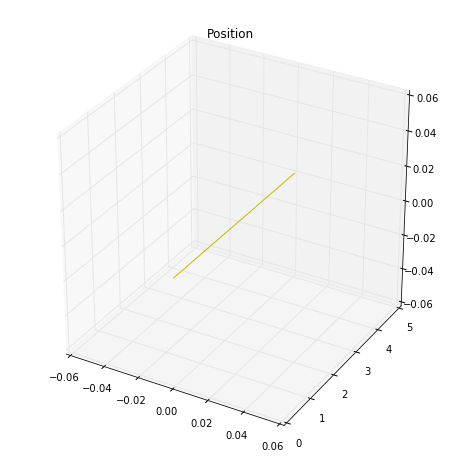

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(rp[:,0], rp[:,1], rp[:,2], color='y')
plt.title("Position")

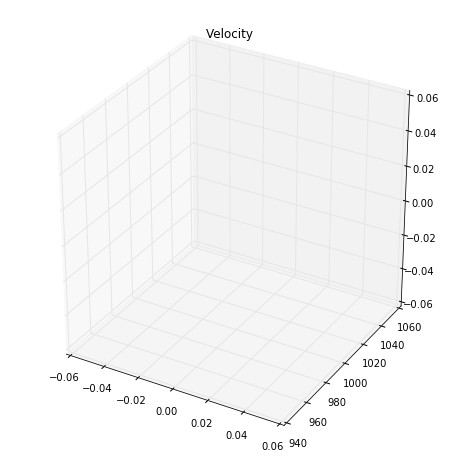

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vp[:,0], vp[:,1], vp[:,2], color='blue')
plt.title("Velocity")

##This is fucked but I don't want to fix it. 

Because of the way the B field and velocity interact with each other, using Euler's method there isn't any velocity. But, if you just add the position up, the position will increase so there is motion. 

In [34]:
##Adding a antiprotion. I just gotta redefine almost everything 
##So I'm abandoming the function

##Proton: 
qe_0 = 1.602E-19  
rp_0 = np.zeros((len(t), 3))    ##position
vp_0 = np.zeros((len(t), 3))    ##velocity
rp_0[0,:] = np.array([0.0, 0.0, 0.0])
vp_0[0,:] = np.array([v0, 0.0, 0.0])

##Antiproton 
qe_1 = -1.602E-19
rp_1 = np.zeros((len(t), 3))    ##position
vp_1 = np.zeros((len(t), 3))    ##velocity
rp_1[0,:] = np.array([0.0, 0.0, 0.0])
vp_1[0,:] = np.array([v0, 0.0, 0.0])

In [35]:
for i in range(0, len(t)-1):
    F_0 = np.cross(qe_0*vp_0[i,:], B)
    F_1 = np.cross(qe_1*vp_1[i,:], B)
    ##Use Euler method on these good boys
    ##Proton
    vp_0[i+1,:] = vp_0[i,:] + F_0*dt
    rp_0[i+1,:] = rp_0[i,:] + vp_0[i,:]*dt
    ##Antiproton
    vp_1[i+1,:] = vp_1[i,:] + F_1*dt
    rp_1[i+1,:] = rp_1[i,:] + vp_1[i,:]*dt

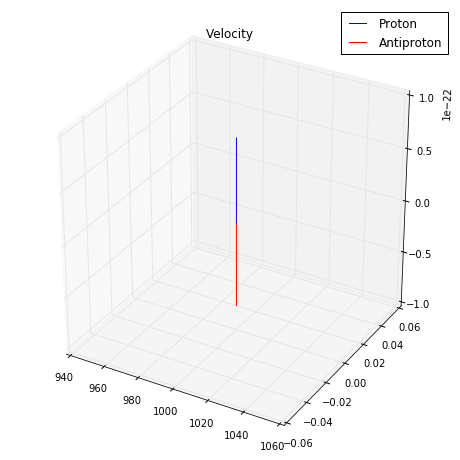

In [40]:
##Plot velocity 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vp_0[:,0], vp_0[:,1], vp_0[:,2], color='blue', label ='Proton')
ax.plot(vp_1[:,0], vp_1[:,1], vp_1[:,2], color='red', label  = 'Antiproton')

ax.legend()
plt.title("Velocity")
plt.show()

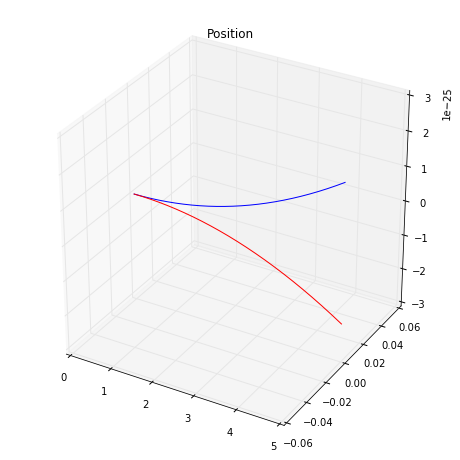

In [37]:
##Plot velocity 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(rp_0[:,0], rp_0[:,1], rp_0[:,2], color='blue', label ='Proton')
ax.plot(rp_1[:,0], rp_1[:,1], rp_1[:,2], color='red', label  = 'Antiproton')

ax.legend()
plt.title("Position")